In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy.stats import spearmanr

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
kerala = pd.read_csv('./kerala.csv')
out = pd.read_csv('./out1.csv')
rainfall = pd.read_csv('./rainfall1901-2015.csv')

In [5]:
kerala.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,73.4,386.2,2122.8,666.1
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,9.3,275.7,2403.4,638.2
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,21.7,336.3,2343.0,570.1
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,26.7,339.4,2398.2,365.3
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,23.4,378.5,1881.5,458.1


In [6]:
kerala.drop_duplicates(keep = "first", inplace = True)
kerala.reset_index(inplace = True, drop = True)

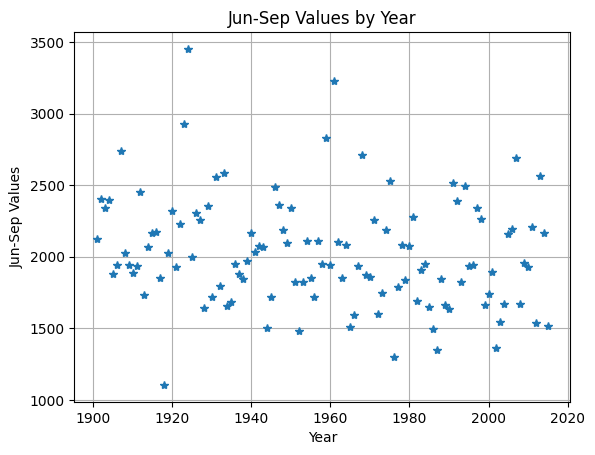

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

y1 = list(kerala["YEAR"])
x1 = list(kerala["Jun-Sep"])
z1 = list(kerala["JUN"]) 
w1 = list(kerala["MAY"]) 

plt.plot(y1, x1, '*')
plt.xlabel('Year')
plt.ylabel('Jun-Sep Values')
plt.title('Jun-Sep Values by Year')
plt.grid(True)
plt.show()

In [15]:
flood = []
june = []
sub = []

for i in range(0,len(x1)):
    if x1[i]>2400:
        flood.append('1')
    else:
        flood.append('0')

# print(len(x1))

for k in range(0,len(x1)):
    june.append(z1[k]/3)

#FINDING THE INCREASE IN RAINFALL FROM THE MONTH OF MAY TO THE MONTH OF JUNE IN EVERY YEAR FROM 1901 TO 2015
for k in range(0,len(x1)):
    sub.append(abs(w1[k]-z1[k]))

# print(len(flood),len(x1))
df = pd.DataFrame({'flood':flood})
df1=pd.DataFrame({'per_10_days':june})

kerala["flood"] = flood
kerala["june"] = june
kerala["sub"] = sub

kerala.to_csv('out1.csv')
print((kerala))

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...    ...   
110      KERALA  2011  20.5  45.7  24.1  165.2  124.2   788.5   536.8  492.7   
111      KERALA  2012   7.4  11.0  21.0  171.1   95.3   430.3   362.6  501.6   
112      KERALA  2013   3.9  40.1  49.9   49.3  119.3  1042.7   830.2  369.7   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8  733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0  252.2   

     ...    NOV    DEC  ANNUAL  Jan-Feb